In [1]:
import nibabel as nib

file_path = r"C:\Users\acer\Desktop\Data_Prep_1\labelsTr\58651_2020_11_02_L_segmented.nii.gz"
img = nib.load(file_path)
segmented_vol = img.get_fdata()
print(segmented_vol.shape)
print(type(segmented_vol))

(415, 481, 481)
<class 'numpy.ndarray'>


In [2]:
file_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr\58651_2020_11_02_L.nii"
img = nib.load(file_path)
original_vol = img.get_fdata()
print(original_vol.shape)
print(type(original_vol))

(481, 481, 481)
<class 'numpy.memmap'>


In [6]:
file_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr\5450_2016_02_26_L.nii"
img = nib.load(file_path)
original_vol = img.get_fdata()
print(original_vol.shape)
print(type(original_vol))

(479, 479, 481)
<class 'numpy.memmap'>


In [7]:
file_path = r"C:\Users\acer\Desktop\Data_Prep_1\labelsTr\Output\5450_2016_02_26_L_segmented_filled.nii.gz"
img = nib.load(file_path)
original_vol = img.get_fdata()
print(original_vol.shape)
print(type(original_vol))

(417, 477, 481)
<class 'numpy.ndarray'>


In [8]:
file_path = r"C:\Users\acer\Desktop\Test\test.nii.gz"
img = nib.load(file_path)
original_vol = img.get_fdata()
print(original_vol.shape)
print(type(original_vol))

(479, 479, 481)
<class 'numpy.ndarray'>


In [4]:
import os
import nibabel as nib
import pandas as pd
import numpy as np

# Paths to the directories
folder1_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr"  # Change to your first folder path
folder2_path = r"C:\Users\acer\Desktop\Data_Prep_1\labelsTr\Output" # Change to your second folder path

# List all .nii files in the first folder
files_folder1 = [f for f in os.listdir(folder1_path) if f.endswith('.nii')]

results = []
# Iterate through the list of .nii files
for file_name in files_folder1:
    # Construct the file path for the current file
    file_path = os.path.join(folder1_path, file_name)
    
    # Load the .nii file using nibabel
    nii_img = nib.load(file_path)
    nii_dims = nii_img.shape
    
    # Construct the corresponding segmentation file name
    # Assuming the naming convention holds perfectly
    base_name = file_name.split('.')[0]  # remove the .nii extension
    segmentation_file_name = f"{base_name}_segmented_filled.nii.gz"
    
    # Construct the path for the segmentation file
    segmentation_file_path = os.path.join(folder2_path, segmentation_file_name)
    
    # Check if the segmentation file exists
    if os.path.exists(segmentation_file_path):
        # Load the segmentation file
        seg_img = nib.load(segmentation_file_path)
        seg_dims = seg_img.shape

        dim_differences = tuple(np.array(seg_dims) - np.array(nii_dims))
        
        # Check if dimensions match
        dimensions_match = nii_dims == seg_dims
        
        # Append results to list
        results.append({
            "Original File": file_name,
            "Segmentation File": segmentation_file_name,
            "Original Dimensions": nii_dims,
            "Segmentation Dimensions": seg_dims,
            "Dimension Differences": dim_differences,
            "Dimensions Match": dimensions_match
        })
    else:
        results.append({
            "Original File": file_name,
            "Segmentation File": segmentation_file_name,
            "Original Dimensions": nii_dims,
            "Segmentation Dimensions": "File not found",
            "Dimension Differences": "N/A",
            "Dimensions Match": "File not found"
        })

df = pd.DataFrame(results)
print(df)

                 Original File                              Segmentation File  \
0     4716872_2018_11_29_L.nii   4716872_2018_11_29_L_segmented_filled.nii.gz   
1     4716872_2018_11_29_R.nii   4716872_2018_11_29_R_segmented_filled.nii.gz   
2     4722136_2019_10_31_L.nii   4722136_2019_10_31_L_segmented_filled.nii.gz   
3     4722136_2019_10_31_R.nii   4722136_2019_10_31_R_segmented_filled.nii.gz   
4      474881_2014_09_25_L.nii    474881_2014_09_25_L_segmented_filled.nii.gz   
..                         ...                                            ...   
370  66700362_2023_07_03_R.nii  66700362_2023_07_03_R_segmented_filled.nii.gz   
371  66700404_2023_08_26_L.nii  66700404_2023_08_26_L_segmented_filled.nii.gz   
372  66700404_2023_08_26_R.nii  66700404_2023_08_26_R_segmented_filled.nii.gz   
373  66700681_2023_11_16_L.nii  66700681_2023_11_16_L_segmented_filled.nii.gz   
374  66700681_2023_11_16_R.nii  66700681_2023_11_16_R_segmented_filled.nii.gz   

    Original Dimensions Seg

In [46]:

# Create padding configuration
pad_width = ((0, 481-415), (0, 0), (0, 0))  # pad before, pad after for each dimension

# Pad the array
padded_array = np.pad(segmented_vol, pad_width=pad_width, mode='constant', constant_values=0)
print(padded_array.shape)
print(type(padded_array))

(481, 481, 481)
<class 'numpy.ndarray'>


In [50]:
file_path = r"C:\Users\acer\Desktop\Test\58651_2020_11_02_L.nii"  # Change this to the desired output path
result_img = nib.Nifti1Image(padded_array, img.affine, img.header)
nib.save(result_img, file_path)

In [51]:
file_path = r"C:\Users\acer\Desktop\Test\58651_2020_11_02_L.nii"
img = nib.load(file_path)
test_vol = img.get_fdata()
print(test_vol.shape)
print(type(test_vol))

(481, 481, 481)
<class 'numpy.ndarray'>


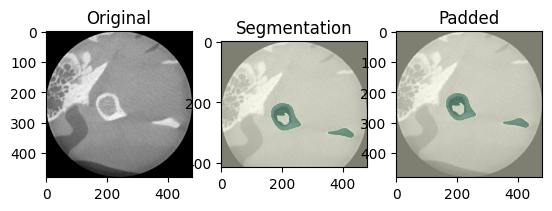

In [38]:
from matplotlib import pyplot as plt

slice_number = 260

f, axarr = plt.subplots(1,3)
axarr[0].set_title("Original")
axarr[0].imshow(original_vol[:,:,slice_number], cmap = 'grey')
axarr[1].set_title("Segmentation")
axarr[1].imshow(original_vol[:,:,slice_number], cmap = 'grey')
axarr[1].imshow(segmented_vol[:,:,slice_number], cmap='YlGn', alpha=0.5)
axarr[2].set_title("Padded")
axarr[2].imshow(original_vol[:,:,slice_number], cmap = 'grey')
axarr[2].imshow(padded_array[:,:,slice_number], cmap='YlGn', alpha=0.5)

In [13]:
import numpy as np

slice_number = 260
origianl_slice = original_vol[:,:,slice_number]
segmented_slice = segmented_vol[:,:,slice_number]
masked_image = np.where(segmented_slice == 1, origianl_slice, 0)

ValueError: operands could not be broadcast together with shapes (415,481) (481,481) () 